In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Carga de datos

**Cargamos** la tabla completa de datos

In [2]:
# Se carga el dataset
hoteles = pd.read_csv("hoteles-entrena.csv")
hoteles['arrival_date'] = pd.to_datetime(hoteles['arrival_date'])
hoteles['arrival_month'] = hoteles['arrival_date'].dt.month_name()
hoteles['arrival_day'] = hoteles['arrival_date'].dt.day_name()

hoteles.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_month,arrival_day
0,Resort_Hotel,342,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,3,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01,July,Wednesday
1,Resort_Hotel,737,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,4,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01,July,Wednesday
2,Resort_Hotel,7,0,1,1,none,BB,GBR,Direct,Direct,0,0,0,A,C,0,No_Deposit,NaN,NaN,0,Transient,75.0,none,0,2015-07-01,July,Wednesday
3,Resort_Hotel,13,0,1,1,none,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No_Deposit,304.0,NaN,0,Transient,75.0,none,0,2015-07-01,July,Wednesday
4,Resort_Hotel,14,0,2,2,none,BB,GBR,Online_TA,TA/TO,0,0,0,A,A,0,No_Deposit,240.0,NaN,0,Transient,98.0,none,1,2015-07-01,July,Wednesday


**Información** del conjunto de datos

In [3]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           61969 non-null  object        
 1   lead_time                       61969 non-null  int64         
 2   stays_in_weekend_nights         61969 non-null  int64         
 3   stays_in_week_nights            61969 non-null  int64         
 4   adults                          61969 non-null  int64         
 5   children                        61969 non-null  object        
 6   meal                            61969 non-null  object        
 7   country                         61548 non-null  object        
 8   market_segment                  61969 non-null  object        
 9   distribution_channel            61969 non-null  object        
 10  is_repeated_guest               61969 non-null  int64         
 11  pr

**Buscamos** predecir para una reservación si se van a tener niños o no

In [4]:
#Categorías de salida
hoteles['children'].unique()

array(['none', 'children'], dtype=object)

In [5]:
#Balanceo de variable respuesta
hoteles['children'].value_counts(normalize=True)

none        0.925366
children    0.074634
Name: children, dtype: float64

**Observaciones**
* El $92.5\%$ de las reservaciones no tienen hijos.
* El $7.5\%$ de las reservaciones tienen hijos.
* La base está fuertemente desbalanceada para la variable respuesta.
* Posiblemente sea requerido un criterio de balanceo de bases.

# Análisis Exploratorio e Ingeniería de Entradas

**Primero** empezamos con las variables que no sean numéricas

In [6]:
cat_vars = hoteles.dtypes[hoteles.dtypes == 'object'].keys()
for var in cat_vars:
    print(f"{var}:")
    print(f"\tCats: {len(hoteles[var].unique())}")
    print(20*'-')

hotel:
	Cats: 2
--------------------
children:
	Cats: 2
--------------------
meal:
	Cats: 5
--------------------
country:
	Cats: 156
--------------------
market_segment:
	Cats: 7
--------------------
distribution_channel:
	Cats: 5
--------------------
reserved_room_type:
	Cats: 9
--------------------
assigned_room_type:
	Cats: 10
--------------------
deposit_type:
	Cats: 3
--------------------
customer_type:
	Cats: 4
--------------------
required_car_parking_spaces:
	Cats: 2
--------------------
arrival_month:
	Cats: 12
--------------------
arrival_day:
	Cats: 7
--------------------


**Descartamos** las variables `country` y `arrival_date` de la lista de variables categóricas para efectos de visualización

In [7]:
cat_panel = cat_vars.to_list()
cat_panel.remove('country')

for var in cat_panel:
    print(f"{var}:")
    print(f"\tCats: {hoteles[var].unique()}")
    print(20*'-')

hotel:
	Cats: ['Resort_Hotel' 'City_Hotel']
--------------------
children:
	Cats: ['none' 'children']
--------------------
meal:
	Cats: ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------
market_segment:
	Cats: ['Direct' 'Corporate' 'Online_TA' 'Offline_TA/TO' 'Complementary' 'Groups'
 'Aviation']
--------------------
distribution_channel:
	Cats: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------
reserved_room_type:
	Cats: ['C' 'A' 'D' 'G' 'E' 'F' 'H' 'L' 'B']
--------------------
assigned_room_type:
	Cats: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'K']
--------------------
deposit_type:
	Cats: ['No_Deposit' 'Refundable' 'Non_Refund']
--------------------
customer_type:
	Cats: ['Transient' 'Contract' 'Transient-Party' 'Group']
--------------------
required_car_parking_spaces:
	Cats: ['none' 'parking']
--------------------
arrival_month:
	Cats: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------

**Graficamos** variables categóricas

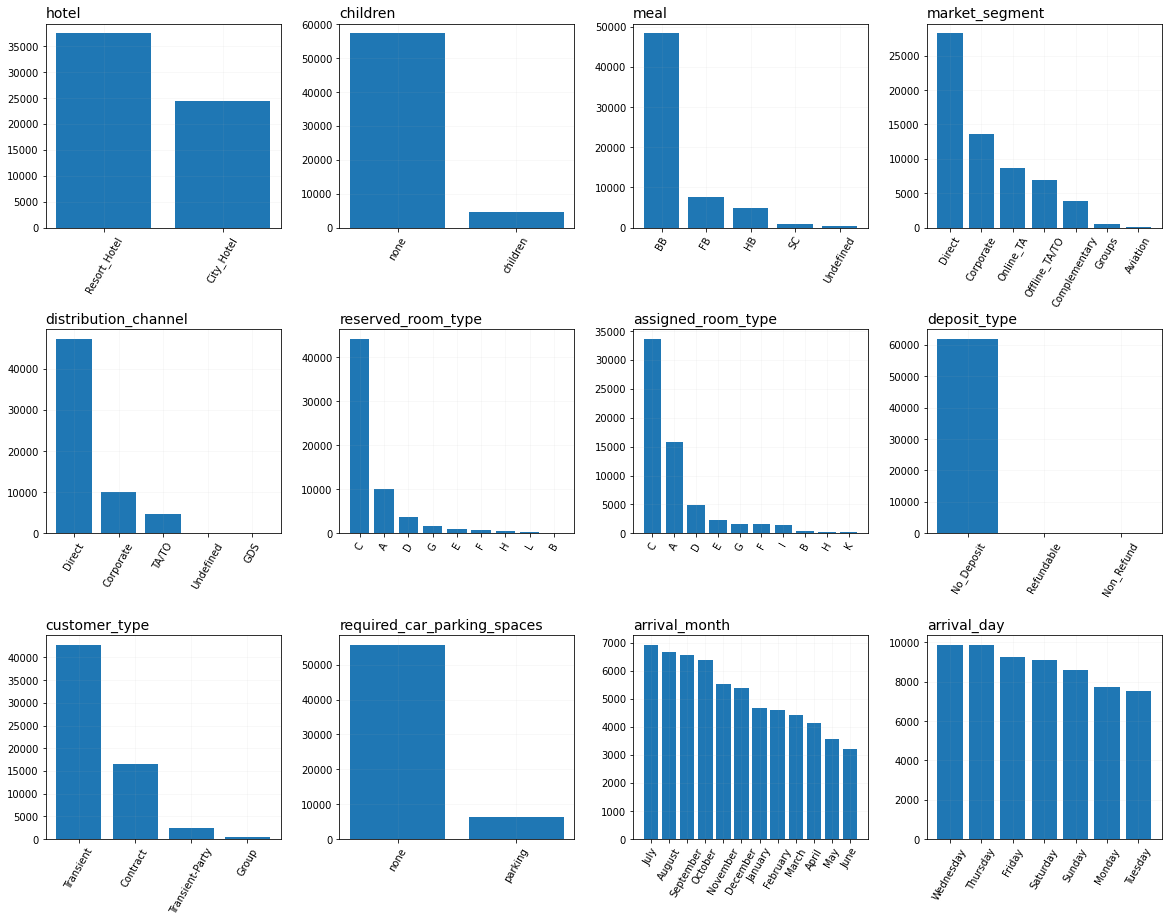

In [8]:
fig = plt.figure(figsize=(20,15))
spec = plt.GridSpec(ncols=4, nrows=3, wspace=0.25, hspace=0.5)

#Páneles
for i in range(len(cat_panel)):
    #Especificaciones de figura
    ax = fig.add_subplot(spec[i])
    
    #Contenido de figura
    ax.bar(x=hoteles[cat_panel[i]].unique(), height=hoteles[cat_panel[i]].value_counts())
    
    #Anotaciones y estilo
    ax.set_title(f"{cat_panel[i]}", fontsize=14, loc='left')
    ax.tick_params(axis='x', labelrotation=60)
    ax.grid(alpha=0.1)
    # ax.legend()

plt.show()

**Observamos** que la variable `deposit_type` está fuertemente desbalanceada, la exploramos rápidamente para determinar la proporción de `children` contenida en aquellas reservaciones diferentes a _No_Deposit_ dentro de `deposit_type`

In [9]:
print("Cuenta de children en deposite_type dado que no hubo depósito:")
print(hoteles.loc[hoteles['deposit_type'] != 'No_Deposit']['children'].value_counts(),'\n')
print("Se descarta variable")

Cuenta de children en deposite_type dado que no hubo depósito:
none        214
children      4
Name: children, dtype: int64 

Se descarta variable


## País de procedencia

**Revisamos** las dos variables categóricas que descartamos del primer análisis, empezando por `country`.

En la información de la base, nos percatamos que `country` es una variable incompleta, entonces:
>**Paso 1**: Reemplazamos valores nulor por _OTH_: Other.

In [10]:
hoteles['country'].fillna(value='OTH', inplace=True)

#Recuento de nulos después de sustituir
print(f"Valores NaN en country: {hoteles['country'].isna().sum()}")

Valores NaN en country: 0


>**Paso 2**: Observamos la distribución de reservaciones hechas por país.

In [11]:
#Función para obtener el ordenamiento de los cuantiles
def cuantiles_df(df, column):
    ordenamiento = pd.DataFrame(df.sort_values(by=column)[column])
    ordenamiento.reset_index(drop=True, inplace=True)
    ordenamiento['orden'] = pd.Series(np.arange(1,ordenamiento.shape[0]+1))
    ordenamiento['f'] = (ordenamiento['orden'] - 0.5)/len(ordenamiento)    
    
    return ordenamiento

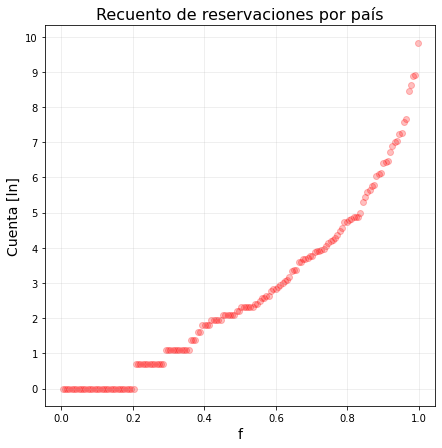

In [12]:
#Se obtiene el recuento de reservaciones por country
books_by_country = hoteles.groupby(by='country').count()[['hotel']]
bbc_cuantiles = cuantiles_df(books_by_country, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=bbc_cuantiles['f'], y=np.log(bbc_cuantiles['hotel']), c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por país', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Cuenta [ln]', fontsize=14)
plt.yticks(ticks=np.arange(11))
plt.grid(alpha=0.25)

**Notamos** que al rededor del $80\%$ de los paises se encuentran por debajo de ${ln}({cuenta}) = 5$, es decir, por debajo de $148$ reservaciones. Análisamos un poco más al respecto.
>**Paso 3**: Filtramos aquellos países cuya cuenta de reservaciones esté por debajo de `148`, y observamos la proporción de `children` contenido en este subconjunto.

In [13]:
#Se obtienen los países por debajo de 148 reservaciones.
country_mask = books_by_country.loc[books_by_country['hotel'] <= 148].index.to_list()

>**Paso 4**: Obtenemos la proporción de `children` contenidos en los países que filtramos

In [14]:
print("Cuenta de children en paises con menos de 148 reservaciones:")
print(hoteles.loc[hoteles['country'].isin(country_mask)]['children'].value_counts(),'\n')
#print("Se descarta variable")

Cuenta de children en paises con menos de 148 reservaciones:
none        2527
children     256
Name: children, dtype: int64 



**Recordamos** la cuenta original de `children`

In [15]:
hoteles['children'].value_counts(normalize=False)

none        57344
children     4625
Name: children, dtype: int64

**Observaciones**:
* Vemos que de las $4,625$ reservaciones con niños, $256$ se hicieron por los paises que fueron filtrados, lo cual representa el $5.5\%$ de las reservaciones totales con niños.
* Como complemento, el $94.5\%$ de las reservaciones con niños están contenidas en el $20\%$ de los países. 

>**Paso 5**: Reemplazamos las etiquetas de paises cuya cuenta de reservaciones ${ln}({cuenta})\leq 5$ por `OTH`: Other, y observamos la nueva distribución de paises.

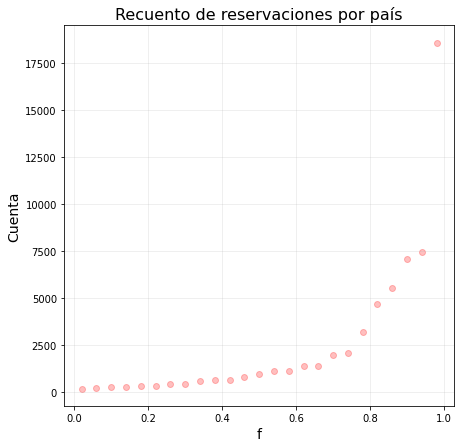

In [16]:
#Reemplazar etiquetas
hoteles.loc[hoteles['country'].isin(country_mask), 'country'] = 'OTH'

#Se obtiene el recuento de reservaciones por country
books_by_country = hoteles.groupby(by='country').count()[['hotel']]
bbc_cuantiles = cuantiles_df(books_by_country, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=bbc_cuantiles['f'], y=bbc_cuantiles['hotel'], c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por país', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Cuenta', fontsize=14)
plt.grid(alpha=0.25)

**Observaciones**:
* La distribución mejoró, pero continúa teniendo una cola extremadamente larga.

**Revisamos** la cuenta de reservaciones con `children` por país de estas nuevas etiquetas

In [17]:
books_by_country = pd.merge(left=books_by_country,
                            right=hoteles.loc[hoteles['children'] == 'children'].groupby(by=['country']).count()[['hotel']],
                            on='country',
                            suffixes=('', '_child'))
books_by_country.sort_values(by='hotel', inplace=True)

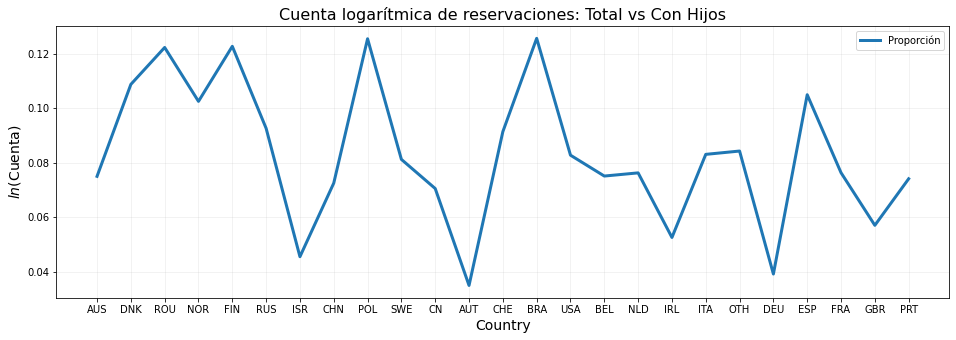

In [18]:
plt.figure(figsize=(16,5))

#plt.plot(books_by_country.index, np.log(books_by_country['hotel'].values), linewidth=3, label='Total de reservaciones')
#plt.plot(books_by_country.index, np.log(books_by_country['hotel_child'].values), linewidth=3, label='Reservaciones con hijos')
plt.plot(books_by_country.index, books_by_country['hotel_child'].values/books_by_country['hotel'].values, linewidth=3, label='Proporción')

#Anotaciones y estilo
plt.title('Cuenta logarítmica de reservaciones: Total vs Con Hijos', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('$ln$(Cuenta)', fontsize=14)
plt.grid(alpha=0.2)
plt.legend()

plt.show()

**Vemos** que en general, a medida que un país tiene mayor número de reservaciones, la tendencia es que aumente el número de reservaciones con hijos, lo cual es una conclusión obvia. Dicho en otras palabra, 

## Descartar variables

In [19]:
cols_to_drop = ['deposit_type', 'days_in_waiting_list', 'company', 'agent', 'arrival_date', 'country']

hoteles.drop(columns=cols_to_drop, inplace=True)
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61969 non-null  object 
 1   lead_time                       61969 non-null  int64  
 2   stays_in_weekend_nights         61969 non-null  int64  
 3   stays_in_week_nights            61969 non-null  int64  
 4   adults                          61969 non-null  int64  
 5   children                        61969 non-null  object 
 6   meal                            61969 non-null  object 
 7   market_segment                  61969 non-null  object 
 8   distribution_channel            61969 non-null  object 
 9   is_repeated_guest               61969 non-null  int64  
 10  previous_cancellations          61969 non-null  int64  
 11  previous_bookings_not_canceled  61969 non-null  int64  
 12  reserved_room_type              

In [20]:
hoteles['children'].replace(to_replace=['none','children'], value=[0,1], inplace=True)
hoteles.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_month,arrival_day
0,Resort_Hotel,342,0,0,2,0,BB,Direct,Direct,0,0,0,C,C,3,Transient,0.0,none,0,July,Wednesday
1,Resort_Hotel,737,0,0,2,0,BB,Direct,Direct,0,0,0,C,C,4,Transient,0.0,none,0,July,Wednesday
2,Resort_Hotel,7,0,1,1,0,BB,Direct,Direct,0,0,0,A,C,0,Transient,75.0,none,0,July,Wednesday
3,Resort_Hotel,13,0,1,1,0,BB,Corporate,Corporate,0,0,0,A,A,0,Transient,75.0,none,0,July,Wednesday
4,Resort_Hotel,14,0,2,2,0,BB,Online_TA,TA/TO,0,0,0,A,A,0,Transient,98.0,none,1,July,Wednesday


# Regresión logística 

Haciendo un primer modelo

In [21]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [22]:
#Partimos en train y test
train, test = train_test_split(hoteles, test_size=0.2)

#Se generan predictoras y respuestas desde el dataset de entrenamiento
xtrain = train.drop('children', axis=1)
ytrain = train['children']

In [23]:
#Objeto de transformación de columnas
column_selector = ColumnTransformer([
    ('label_bin2', OneHotEncoder(sparse=True, handle_unknown='ignore'), make_column_selector(dtype_include='object')),
    ("scaler", MinMaxScaler(), make_column_selector(dtype_include=['int', 'float']))
])

#Se genera un pipeline
log_reg = Pipeline([
    ('select_cols', column_selector),
    ('log_reg', LogisticRegression(max_iter=500))
])

In [24]:
%%time

#Entrenamiento
log_reg.fit(xtrain, ytrain)

Wall time: 1.12 s


Pipeline(steps=[('select_cols',
                 ColumnTransformer(transformers=[('label_bin2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000252F96CE970>),
                                                 ('scaler', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000252F9673D00>)])),
                ('log_reg', LogisticRegression(max_iter=500))])

In [25]:
%%time

cvscore = cross_validate(log_reg, xtrain, ytrain, cv=10, scoring='neg_log_loss')
cvscore

Wall time: 10 s


{'fit_time': array([1.12749505, 0.99066329, 0.97697663, 1.00270176, 0.98074651,
        0.97340751, 0.89789748, 0.91173458, 0.94776773, 0.97045255]),
 'score_time': array([0.02220225, 0.01898885, 0.01898766, 0.01799583, 0.01897359,
        0.01800418, 0.01898766, 0.01897931, 0.01802421, 0.02417445]),
 'test_score': array([-0.17224302, -0.17890167, -0.1708953 , -0.16944839, -0.16960787,
        -0.17323739, -0.17344734, -0.18068489, -0.17750445, -0.1809332 ])}

In [26]:
-cvscore['test_score'].mean()

0.17469035143886308

## Evaluando con datos de validación

In [27]:
#Se generan predictoras y respuestas desde el dataset de entrenamiento
xval = test.drop('children', axis=1)
yval = test['children']

In [28]:
log_loss(y_true=yval, y_pred=log_reg.predict_proba(xval))

0.17739630712109664

# Regresión Logística - GridSearch

Encontrando mejores estimadores

In [33]:
#Objeto de transformación de columnas
column_selector = ColumnTransformer([
    ('label_bin2', OneHotEncoder(sparse=True, handle_unknown='ignore'), make_column_selector(dtype_include='object')),
    ("scaler", MinMaxScaler(), make_column_selector(dtype_include=['int', 'float']))
])

#Se genera un pipeline
log_reg = Pipeline([
    ('select_cols', column_selector),
    ('log_reg', LogisticRegression(penalty='l2',
                                   C=1,
                                   class_weight=None,
                                   solver='saga',
                                   max_iter=500,
                                   n_jobs=-1))
])

#key format: 'modelo__hiperparámetro'
grid = {'log_reg__penalty': ['l1', 'l2'],
        'log_reg__C': [1, 1e-1, 1e-2],
        'log_reg__class_weight': [None, 'balanced']}

In [34]:
%%time

#Se inicia objeto GridSerachCV con Pipeline previo, para todos los params en grid
gsearch = GridSearchCV(estimator=log_reg,
                       param_grid=grid,
                       scoring='neg_log_loss',
                       n_jobs=-1,
                       cv=5,
                       verbose=1,
                       return_train_score=True)

gsearch.fit(xtrain, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select_cols',
                                        ColumnTransformer(transformers=[('label_bin2',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025408A3A1C0>),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025408A3A310>)])),
                                       ('log_reg',
                                        LogisticRegression(C=1, max_iter=500,
                                                           n_jobs=-1,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [1, 0.1, 0.01],
                         'log_reg__class_weight': [None, 'balanced'],
                         'log_reg__penalty': ['l1', 'l2']},
             return_train_score=True, scoring='neg_log_loss', verbose=1)

In [35]:
gsearch.best_params_

{'log_reg__C': 1, 'log_reg__class_weight': None, 'log_reg__penalty': 'l1'}

**Validación cruzada** con el mejor modelo

In [31]:
#Objeto de transformación de columnas
column_selector = ColumnTransformer([
    ('label_bin2', OneHotEncoder(sparse=True, handle_unknown='ignore'), make_column_selector(dtype_include='object')),
    ("scaler", MinMaxScaler(), make_column_selector(dtype_include=['int', 'float']))
])

#Se genera un pipeline
log_reg = Pipeline([
    ('select_cols', column_selector),
    ('log_reg', LogisticRegression(penalty='l1', solver='saga', max_iter=500, n_jobs=-1))
])

#Entrenamiento
log_reg.fit(xtrain, ytrain)

#Validación cruzada
cvscore = cross_validate(log_reg, xtrain, ytrain, cv=10, scoring='neg_log_loss', n_jobs=-1)
-cvscore['test_score'].mean()

0.17459249807997346

## Evaluando con datos de validación

In [32]:
log_reg.predict(xval)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
log_loss(y_true=yval, y_pred=log_reg.predict_proba(xval))

0.17740288811251073

**Ganancia** mínima

# Evaluando con datos de prueba

In [35]:
# Se carga el dataset
hoteles_prueba = pd.read_csv("hoteles-prueba.csv", index_col='id')
hoteles_prueba['arrival_date'] = pd.to_datetime(hoteles_prueba['arrival_date'])
hoteles_prueba['arrival_month'] = hoteles_prueba['arrival_date'].dt.month_name()
hoteles_prueba['arrival_day'] = hoteles_prueba['arrival_date'].dt.day_name()

#Columnas por descartar
cols_to_drop = ['deposit_type', 'days_in_waiting_list', 'company', 'agent', 'arrival_date', 'country']
hoteles_prueba.drop(columns=cols_to_drop, inplace=True)

hoteles_prueba.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_month,arrival_day
id,,,,,,,,,,,,,,,,,,,,
1,Resort_Hotel,3,1,0,1,SC,Corporate,Corporate,0,0,0,A,I,0,Transient,0.0,none,0,May,Monday
2,Resort_Hotel,3,0,1,1,BB,Corporate,Corporate,0,0,0,A,A,0,Transient,135.0,none,0,August,Thursday
3,Resort_Hotel,4,0,1,1,BB,Corporate,Corporate,0,0,2,A,D,0,Transient,135.0,none,0,August,Tuesday
4,Resort_Hotel,4,0,1,1,BB,Corporate,Corporate,0,0,3,A,A,1,Transient,142.0,parking,0,July,Tuesday
5,Resort_Hotel,186,4,6,3,HB,Direct,Direct,0,0,1,E,E,0,Transient,248.1,parking,1,July,Saturday


**Predicción** de valores

In [36]:
log_reg.predict(hoteles_prueba)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
hoteles_prueba['prob'] = log_reg.predict_proba(hoteles_prueba)[:,1]
hoteles_prueba

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_month,arrival_day,prob
id,,,,,,,,,,,,,,,,,,,,,
1,Resort_Hotel,3,1,0,1,SC,Corporate,Corporate,0,0,0,A,I,0,Transient,0.00,none,0,May,Monday,0.004233
2,Resort_Hotel,3,0,1,1,BB,Corporate,Corporate,0,0,0,A,A,0,Transient,135.00,none,0,August,Thursday,0.008750
3,Resort_Hotel,4,0,1,1,BB,Corporate,Corporate,0,0,2,A,D,0,Transient,135.00,none,0,August,Tuesday,0.028683
4,Resort_Hotel,4,0,1,1,BB,Corporate,Corporate,0,0,3,A,A,1,Transient,142.00,parking,0,July,Tuesday,0.011598
5,Resort_Hotel,186,4,6,3,HB,Direct,Direct,0,0,1,E,E,0,Transient,248.10,parking,1,July,Saturday,0.205925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,City_Hotel,23,2,5,2,BB,Offline_TA/TO,TA/TO,0,0,0,A,A,0,Transient,96.14,none,0,August,Wednesday,0.027917
13194,City_Hotel,102,2,5,3,BB,Online_TA,TA/TO,0,0,0,E,E,0,Transient,225.43,none,2,August,Thursday,0.350925
13195,City_Hotel,34,2,5,2,BB,Online_TA,TA/TO,0,0,0,D,D,0,Transient,157.71,none,4,August,Thursday,0.416419


In [40]:
hoteles_prueba[['prob']].to_csv('results.csv')

# Limpieza

In [ ]:
df.info()

In [ ]:
# Nos deshacemos de variables
df.drop(['arrival_date','deposit_type','agent','company','booking_changes','distribution_channel','country'],axis=1, inplace=True)

In [ ]:
# Cambiamos de variables caegoricas a numericas
df["required_car_parking_spaces"] = df["required_car_parking_spaces"].astype('category').cat.codes
df["hotel"] = df["hotel"].astype('category').cat.codes
df["children"] = df["children"].astype('category').cat.codes

In [ ]:
# Creamos one-hot encoding para las siguientes variables:
df = pd.concat([df, pd.get_dummies(df.meal)], axis=1)
df.drop(['meal'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.market_segment)], axis=1)
df.drop(['market_segment'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.reserved_room_type)], axis=1)
df.drop(['reserved_room_type'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.assigned_room_type)], axis=1)
df.drop(['assigned_room_type'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.customer_type)], axis=1)
df.drop(['customer_type'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
# Distribuciones

In [ ]:
# First target variable alone
sns.countplot(x='children', data=df)
plt.show()

In [ ]:
# Let's explore correlations between pairs of variables
corrmat = df.corr()

sns.heatmap(corrmat, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat['children'])

# Separacion

In [ ]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,test_size=0.2)
print(df_train.shape)
print(df_test.shape)

#x_train=df_train.drop('children',axis = 1)
#y_train = df_train[['children']]
#print(x_train.shape)
#print(y_train.shape)

#x_test=df_test.drop('children',axis = 1)
#y_test = df_test[['children']]
#print(x_test.shape)
#print(y_test.shape)

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='children', data=df_train)
plt.subplot(1, 2, 2)
sns.countplot(x='children', data=df_test)
plt.show()

# Entrenar

In [ ]:
x_train=df_train.drop('children',axis = 1).to_numpy()
y_train = df_train[['children']].to_numpy()
print(x_train.shape)
print(y_train.shape)

x_test=df_test.drop('children',axis = 1).to_numpy()
y_test = df_test[['children']].to_numpy()
print(x_test.shape)
print(y_test.shape)

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Train a regressor to approximate missing value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_hyp_params = {'penalty': ['l1', 'l2', 'elastic', 'None'],
                   'C': np.logspace(-7, 4, 6),
                   'l1_ratio': np.arange(0., 1.1, 0.5),
                   'class_weight': ['balanced', 'None']
                  }
gs = GridSearchCV(LogisticRegression(solver='saga'), grid_hyp_params)

gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

In [ ]:
np.arange(0,1.1,0.5)

In [ ]:
from sklearn.metrics import accuracy_score as acc
print(f"Accuracy on the test set: {acc(gs.best_estimator_.predict(x_test), y_test):.3f}")

In [ ]:
predicciones=gs.best_estimator_.predict_proba(x_test)
pd.DataFrame(predicciones)

# Datos prueba 

In [ ]:
prueba = pd.read_csv("hoteles-prueba.csv")

In [ ]:
# Nos deshacemos de variables
prueba.drop(['arrival_date','deposit_type','agent','company','booking_changes','distribution_channel','country'],axis=1, inplace=True)

In [ ]:
# Cambiamos de variables caegoricas a numericas
prueba["required_car_parking_spaces"] = prueba["required_car_parking_spaces"].astype('category').cat.codes
prueba["hotel"] = prueba["hotel"].astype('category').cat.codes


In [ ]:
# Creamos one-hot encoding para las siguientes variables:
prueba = pd.concat([prueba, pd.get_dummies(prueba.meal)], axis=1)
prueba.drop(['meal'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.market_segment)], axis=1)
prueba.drop(['market_segment'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.reserved_room_type)], axis=1)
prueba.drop(['reserved_room_type'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.assigned_room_type)], axis=1)
prueba.drop(['assigned_room_type'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.customer_type)], axis=1)
prueba.drop(['customer_type'], axis=1, inplace=True)

In [ ]:
predicciones_prueba=gs.best_estimator_.predict_proba(prueba)
pd.DataFrame(predicciones_prueba)